# Kaggle Titanic Classification Problem

## Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table
from ISLP.models import ModelSpec as MS

from sklearn.tree import ( DecisionTreeClassifier as DTC ,
DecisionTreeRegressor as DTR ,
plot_tree ,
export_text)
from sklearn.metrics import (accuracy_score ,
log_loss)
from sklearn.ensemble import \
(RandomForestRegressor as RF ,
GradientBoostingRegressor as GBR)
from ISLP.bart import BART

## Boilerplate

In [63]:
df = pd.read_csv(filepath_or_buffer="../Data/train.csv")
test_df = pd.read_csv(filepath_or_buffer="../Data/test.csv")
X_without_dummies = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].dropna(axis = "index")
X = pd.get_dummies(data = X_without_dummies)
Y = df[["Survived"]]

## EDA

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [122]:
survived_data = df.loc[df["Survived"] == 1, :].dropna(axis = "index")
not_survived_data = df.loc[df["Survived"] == 0, :].dropna(axis = "index")

Comments placeholder

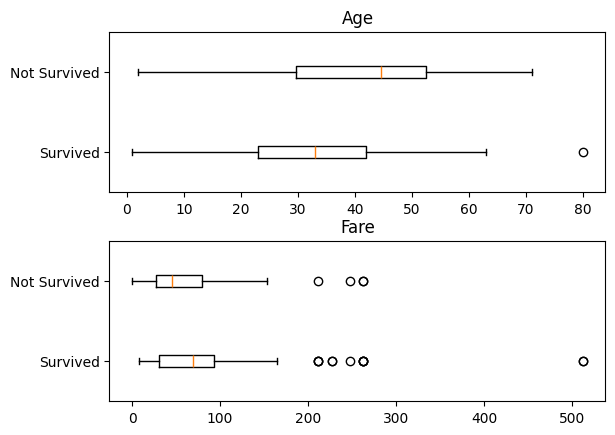

In [124]:
fig_num, axs_num = plt.subplots(2)
plt.subplots_adjust(hspace=0.3)
axs_num[0].boxplot([survived_data.loc[:, "Age"].values, not_survived_data.loc[:, "Age"].values], labels=['Survived', 'Not Survived'], vert = False);
axs_num[0].set_title("Age");
axs_num[1].boxplot([survived_data.loc[:, "Fare"].values, not_survived_data.loc[:, "Fare"].values], labels=['Survived', 'Not Survived'], vert = False);
axs_num[1].set_title("Fare");       # Outlier Sensitivity is decreased to increase ease of visualization

In [117]:
df.loc[:, ["Survived", "Pclass"]].value_counts

<bound method DataFrame.value_counts of      Survived  Pclass
0           0       3
1           1       1
2           1       3
3           1       1
4           0       3
..        ...     ...
886         0       2
887         1       1
888         0       3
889         1       1
890         0       3

[891 rows x 2 columns]>

## The Model

The focus of this notebook is primarily for me to practice trees so we start by analysing the data using a basic decision tree. This will also determine the most valuable predictors for our model. Note: Tree based methods are not scale sensitive so we will not be standardizing the data as according to the theory, it will not give us a useful performance increase. 

NameError: name 'fit_transform' is not defined